# Plant Disease Classification Using Keras CNN

In [ ]:
!pip install --user imblearn

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Activation, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE 
from tensorflow.keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [4]:
train_data = pd.read_csv("../input/plant-pathology-2020-fgvc7/train.csv", engine = 'python')

In [5]:
train_data.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


## Basic EDA & Image Preprocessing

Text(0, 0.5, 'Counts')

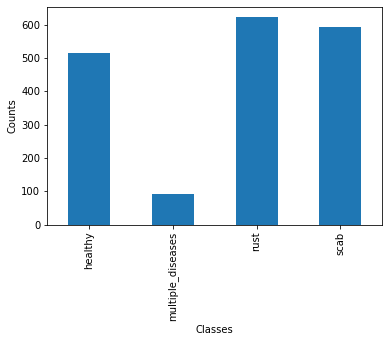

In [6]:
train_data.drop(columns=['image_id']).sum().plot.bar()
plt.xlabel("Classes")
plt.ylabel('Counts')

In [7]:
height = 1365
width = 2048
color_channels = 3
new_height = 224
new_width = 224

In [8]:
images = np.ndarray(shape=(len(train_data), new_height, new_width, color_channels), dtype=np.float32)

In [10]:
for i in range(len(train_data)):
    print("Image: " + str(i))
    image = tf.keras.preprocessing.image.load_img("../input/plant-pathology-2020-fgvc7/images/"+train_data['image_id'].iloc[i]+'.jpg')
    image = image.resize((new_width, new_height))
    image = tf.keras.preprocessing.image.img_to_array(image)
    print(image.shape)
    images[i] = image

Image: 0
(224, 224, 3)
Image: 1
(224, 224, 3)
Image: 2
(224, 224, 3)
Image: 3
(224, 224, 3)
Image: 4
(224, 224, 3)
Image: 5
(224, 224, 3)
Image: 6
(224, 224, 3)
Image: 7
(224, 224, 3)
Image: 8
(224, 224, 3)
Image: 9
(224, 224, 3)
Image: 10
(224, 224, 3)
Image: 11
(224, 224, 3)
Image: 12
(224, 224, 3)
Image: 13
(224, 224, 3)
Image: 14
(224, 224, 3)
Image: 15
(224, 224, 3)
Image: 16
(224, 224, 3)
Image: 17
(224, 224, 3)
Image: 18
(224, 224, 3)
Image: 19
(224, 224, 3)
Image: 20
(224, 224, 3)
Image: 21
(224, 224, 3)
Image: 22
(224, 224, 3)
Image: 23
(224, 224, 3)
Image: 24
(224, 224, 3)
Image: 25
(224, 224, 3)
Image: 26
(224, 224, 3)
Image: 27
(224, 224, 3)
Image: 28
(224, 224, 3)
Image: 29
(224, 224, 3)
Image: 30
(224, 224, 3)
Image: 31
(224, 224, 3)
Image: 32
(224, 224, 3)
Image: 33
(224, 224, 3)
Image: 34
(224, 224, 3)
Image: 35
(224, 224, 3)
Image: 36
(224, 224, 3)
Image: 37
(224, 224, 3)
Image: 38
(224, 224, 3)
Image: 39
(224, 224, 3)
Image: 40
(224, 224, 3)
Image: 41
(224, 224, 3)
Im

(224, 224, 3)
Image: 335
(224, 224, 3)
Image: 336
(224, 224, 3)
Image: 337
(224, 224, 3)
Image: 338
(224, 224, 3)
Image: 339
(224, 224, 3)
Image: 340
(224, 224, 3)
Image: 341
(224, 224, 3)
Image: 342
(224, 224, 3)
Image: 343
(224, 224, 3)
Image: 344
(224, 224, 3)
Image: 345
(224, 224, 3)
Image: 346
(224, 224, 3)
Image: 347
(224, 224, 3)
Image: 348
(224, 224, 3)
Image: 349
(224, 224, 3)
Image: 350
(224, 224, 3)
Image: 351
(224, 224, 3)
Image: 352
(224, 224, 3)
Image: 353
(224, 224, 3)
Image: 354
(224, 224, 3)
Image: 355
(224, 224, 3)
Image: 356
(224, 224, 3)
Image: 357
(224, 224, 3)
Image: 358
(224, 224, 3)
Image: 359
(224, 224, 3)
Image: 360
(224, 224, 3)
Image: 361
(224, 224, 3)
Image: 362
(224, 224, 3)
Image: 363
(224, 224, 3)
Image: 364
(224, 224, 3)
Image: 365
(224, 224, 3)
Image: 366
(224, 224, 3)
Image: 367
(224, 224, 3)
Image: 368
(224, 224, 3)
Image: 369
(224, 224, 3)
Image: 370
(224, 224, 3)
Image: 371
(224, 224, 3)
Image: 372
(224, 224, 3)
Image: 373
(224, 224, 3)
Image: 374


(224, 224, 3)
Image: 664
(224, 224, 3)
Image: 665
(224, 224, 3)
Image: 666
(224, 224, 3)
Image: 667
(224, 224, 3)
Image: 668
(224, 224, 3)
Image: 669
(224, 224, 3)
Image: 670
(224, 224, 3)
Image: 671
(224, 224, 3)
Image: 672
(224, 224, 3)
Image: 673
(224, 224, 3)
Image: 674
(224, 224, 3)
Image: 675
(224, 224, 3)
Image: 676
(224, 224, 3)
Image: 677
(224, 224, 3)
Image: 678
(224, 224, 3)
Image: 679
(224, 224, 3)
Image: 680
(224, 224, 3)
Image: 681
(224, 224, 3)
Image: 682
(224, 224, 3)
Image: 683
(224, 224, 3)
Image: 684
(224, 224, 3)
Image: 685
(224, 224, 3)
Image: 686
(224, 224, 3)
Image: 687
(224, 224, 3)
Image: 688
(224, 224, 3)
Image: 689
(224, 224, 3)
Image: 690
(224, 224, 3)
Image: 691
(224, 224, 3)
Image: 692
(224, 224, 3)
Image: 693
(224, 224, 3)
Image: 694
(224, 224, 3)
Image: 695
(224, 224, 3)
Image: 696
(224, 224, 3)
Image: 697
(224, 224, 3)
Image: 698
(224, 224, 3)
Image: 699
(224, 224, 3)
Image: 700
(224, 224, 3)
Image: 701
(224, 224, 3)
Image: 702
(224, 224, 3)
Image: 703


(224, 224, 3)
Image: 993
(224, 224, 3)
Image: 994
(224, 224, 3)
Image: 995
(224, 224, 3)
Image: 996
(224, 224, 3)
Image: 997
(224, 224, 3)
Image: 998
(224, 224, 3)
Image: 999
(224, 224, 3)
Image: 1000
(224, 224, 3)
Image: 1001
(224, 224, 3)
Image: 1002
(224, 224, 3)
Image: 1003
(224, 224, 3)
Image: 1004
(224, 224, 3)
Image: 1005
(224, 224, 3)
Image: 1006
(224, 224, 3)
Image: 1007
(224, 224, 3)
Image: 1008
(224, 224, 3)
Image: 1009
(224, 224, 3)
Image: 1010
(224, 224, 3)
Image: 1011
(224, 224, 3)
Image: 1012
(224, 224, 3)
Image: 1013
(224, 224, 3)
Image: 1014
(224, 224, 3)
Image: 1015
(224, 224, 3)
Image: 1016
(224, 224, 3)
Image: 1017
(224, 224, 3)
Image: 1018
(224, 224, 3)
Image: 1019
(224, 224, 3)
Image: 1020
(224, 224, 3)
Image: 1021
(224, 224, 3)
Image: 1022
(224, 224, 3)
Image: 1023
(224, 224, 3)
Image: 1024
(224, 224, 3)
Image: 1025
(224, 224, 3)
Image: 1026
(224, 224, 3)
Image: 1027
(224, 224, 3)
Image: 1028
(224, 224, 3)
Image: 1029
(224, 224, 3)
Image: 1030
(224, 224, 3)
Image

(224, 224, 3)
Image: 1309
(224, 224, 3)
Image: 1310
(224, 224, 3)
Image: 1311
(224, 224, 3)
Image: 1312
(224, 224, 3)
Image: 1313
(224, 224, 3)
Image: 1314
(224, 224, 3)
Image: 1315
(224, 224, 3)
Image: 1316
(224, 224, 3)
Image: 1317
(224, 224, 3)
Image: 1318
(224, 224, 3)
Image: 1319
(224, 224, 3)
Image: 1320
(224, 224, 3)
Image: 1321
(224, 224, 3)
Image: 1322
(224, 224, 3)
Image: 1323
(224, 224, 3)
Image: 1324
(224, 224, 3)
Image: 1325
(224, 224, 3)
Image: 1326
(224, 224, 3)
Image: 1327
(224, 224, 3)
Image: 1328
(224, 224, 3)
Image: 1329
(224, 224, 3)
Image: 1330
(224, 224, 3)
Image: 1331
(224, 224, 3)
Image: 1332
(224, 224, 3)
Image: 1333
(224, 224, 3)
Image: 1334
(224, 224, 3)
Image: 1335
(224, 224, 3)
Image: 1336
(224, 224, 3)
Image: 1337
(224, 224, 3)
Image: 1338
(224, 224, 3)
Image: 1339
(224, 224, 3)
Image: 1340
(224, 224, 3)
Image: 1341
(224, 224, 3)
Image: 1342
(224, 224, 3)
Image: 1343
(224, 224, 3)
Image: 1344
(224, 224, 3)
Image: 1345
(224, 224, 3)
Image: 1346
(224, 224, 3

(224, 224, 3)
Image: 1626
(224, 224, 3)
Image: 1627
(224, 224, 3)
Image: 1628
(224, 224, 3)
Image: 1629
(224, 224, 3)
Image: 1630
(224, 224, 3)
Image: 1631
(224, 224, 3)
Image: 1632
(224, 224, 3)
Image: 1633
(224, 224, 3)
Image: 1634
(224, 224, 3)
Image: 1635
(224, 224, 3)
Image: 1636
(224, 224, 3)
Image: 1637
(224, 224, 3)
Image: 1638
(224, 224, 3)
Image: 1639
(224, 224, 3)
Image: 1640
(224, 224, 3)
Image: 1641
(224, 224, 3)
Image: 1642
(224, 224, 3)
Image: 1643
(224, 224, 3)
Image: 1644
(224, 224, 3)
Image: 1645
(224, 224, 3)
Image: 1646
(224, 224, 3)
Image: 1647
(224, 224, 3)
Image: 1648
(224, 224, 3)
Image: 1649
(224, 224, 3)
Image: 1650
(224, 224, 3)
Image: 1651
(224, 224, 3)
Image: 1652
(224, 224, 3)
Image: 1653
(224, 224, 3)
Image: 1654
(224, 224, 3)
Image: 1655
(224, 224, 3)
Image: 1656
(224, 224, 3)
Image: 1657
(224, 224, 3)
Image: 1658
(224, 224, 3)
Image: 1659
(224, 224, 3)
Image: 1660
(224, 224, 3)
Image: 1661
(224, 224, 3)
Image: 1662
(224, 224, 3)
Image: 1663
(224, 224, 3

In [11]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.show()

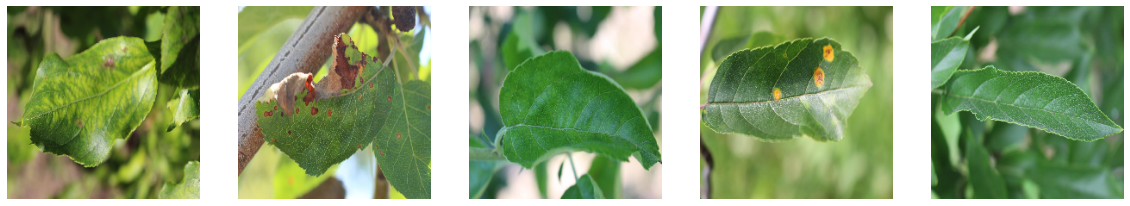

In [12]:
plotImages(images[:5] / 255)

In [13]:
labels = train_data.drop(columns=['image_id'])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(images, np.array(labels.values), test_size=0.20, random_state=42)

### Use SMOTE to obtain a balanced dataset

In [15]:
sm = SMOTE(random_state=42)

In [16]:
X_train, y_train = sm.fit_resample(X_train.reshape((-1, new_height * new_width * 3)), y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass classes=[0 1 2 3] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [17]:
X_train = X_train.reshape((-1, new_height, new_width, 3))

### Image Data Generator Augments images by rotating, changing lighting, etc.

In [18]:
train_datagen = ImageDataGenerator(
    rotation_range=45, width_shift_range=0.25,
    height_shift_range=0.25, shear_range=0.5, 
    zoom_range=0.25,horizontal_flip=True, vertical_flip=True, brightness_range=[0.5, 1.5],
    fill_mode="nearest", rescale=1./255)
train_datagen.fit(X_train)

In [19]:
test_datagen = ImageDataGenerator(
    rotation_range=45, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, vertical_flip=True, brightness_range=[0.5, 1.5],
    fill_mode="nearest", rescale=1./255)
test_datagen.fit(X_test)

### Define Model and Train

In [20]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation ='relu', padding = 'same', input_shape = images.shape[1:]))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation ='relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(128, (3, 3), activation ='relu', padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation ='relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation ='relu', padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation ='relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation ='relu', padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation ='relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(BatchNormalization())
model.add(Dense(4, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 74, 74, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 74, 74, 128)       5

In [21]:
model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [22]:
LR_reduce=ReduceLROnPlateau(monitor='val_accuracy',
                            patience=5,
                            verbose=1)

In [23]:
ES_monitor=EarlyStopping(monitor='val_loss',
                          patience=10)

In [24]:
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=32), 
                    steps_per_epoch=X_train.shape[0] // 32,
                    epochs=400, 
                    validation_data=test_datagen.flow(X_test, y_test, batch_size=32),
                    validation_steps=X_test.shape[0] // 32, callbacks=[ES_monitor,LR_reduce])

Epoch 1/400
62/62 [==============================] - 35s 564ms/step - loss: 1.7482 - accuracy: 0.3578 - val_loss: 4.6435 - val_accuracy: 0.0483 - lr: 0.0010
Epoch 2/400
62/62 [==============================] - 35s 565ms/step - loss: 1.2552 - accuracy: 0.4367 - val_loss: 3.1767 - val_accuracy: 0.0483 - lr: 0.0010
Epoch 3/400
62/62 [==============================] - 34s 545ms/step - loss: 1.1507 - accuracy: 0.4858 - val_loss: 2.3926 - val_accuracy: 0.1875 - lr: 0.0010
Epoch 4/400
62/62 [==============================] - 35s 562ms/step - loss: 1.0455 - accuracy: 0.5471 - val_loss: 3.3894 - val_accuracy: 0.1278 - lr: 0.0010
Epoch 5/400
62/62 [==============================] - 35s 565ms/step - loss: 1.0025 - accuracy: 0.5587 - val_loss: 3.0145 - val_accuracy: 0.3125 - lr: 0.0010
Epoch 6/400
62/62 [==============================] - 34s 553ms/step - loss: 0.8634 - accuracy: 0.6215 - val_loss: 2.5398 - val_accuracy: 0.2273 - lr: 0.0010
Epoch 7/400
62/62 [==============================] - 35s 5

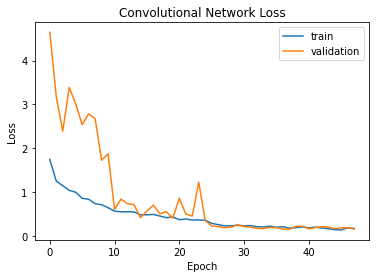

In [25]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Convolutional Network Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'])
plt.show()

### Save Model and Classify Test Images

In [26]:
model.save('plant_disease_model.h5')

In [27]:
classifier = tf.keras.models.load_model('plant_disease_model.h5')

In [28]:
test_data = pd.read_csv("../input/plant-pathology-2020-fgvc7/test.csv")

In [29]:
test_data.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


In [30]:
test_images = np.ndarray(shape=(len(train_data), new_height, new_width, color_channels), dtype=np.float32)

In [33]:
for i in range(len(test_data)):
    print("Image: " + str(i))
    image = tf.keras.preprocessing.image.load_img("../input/plant-pathology-2020-fgvc7/images/"+test_data['image_id'].iloc[i]+'.jpg')
    image = image.resize((new_width, new_height))
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = image/255
    print(image.shape)
    test_images[i] = image

Image: 0
(224, 224, 3)
Image: 1
(224, 224, 3)
Image: 2
(224, 224, 3)
Image: 3
(224, 224, 3)
Image: 4
(224, 224, 3)
Image: 5
(224, 224, 3)
Image: 6
(224, 224, 3)
Image: 7
(224, 224, 3)
Image: 8
(224, 224, 3)
Image: 9
(224, 224, 3)
Image: 10
(224, 224, 3)
Image: 11
(224, 224, 3)
Image: 12
(224, 224, 3)
Image: 13
(224, 224, 3)
Image: 14
(224, 224, 3)
Image: 15
(224, 224, 3)
Image: 16
(224, 224, 3)
Image: 17
(224, 224, 3)
Image: 18
(224, 224, 3)
Image: 19
(224, 224, 3)
Image: 20
(224, 224, 3)
Image: 21
(224, 224, 3)
Image: 22
(224, 224, 3)
Image: 23
(224, 224, 3)
Image: 24
(224, 224, 3)
Image: 25
(224, 224, 3)
Image: 26
(224, 224, 3)
Image: 27
(224, 224, 3)
Image: 28
(224, 224, 3)
Image: 29
(224, 224, 3)
Image: 30
(224, 224, 3)
Image: 31
(224, 224, 3)
Image: 32
(224, 224, 3)
Image: 33
(224, 224, 3)
Image: 34
(224, 224, 3)
Image: 35
(224, 224, 3)
Image: 36
(224, 224, 3)
Image: 37
(224, 224, 3)
Image: 38
(224, 224, 3)
Image: 39
(224, 224, 3)
Image: 40
(224, 224, 3)
Image: 41
(224, 224, 3)
Im

(224, 224, 3)
Image: 335
(224, 224, 3)
Image: 336
(224, 224, 3)
Image: 337
(224, 224, 3)
Image: 338
(224, 224, 3)
Image: 339
(224, 224, 3)
Image: 340
(224, 224, 3)
Image: 341
(224, 224, 3)
Image: 342
(224, 224, 3)
Image: 343
(224, 224, 3)
Image: 344
(224, 224, 3)
Image: 345
(224, 224, 3)
Image: 346
(224, 224, 3)
Image: 347
(224, 224, 3)
Image: 348
(224, 224, 3)
Image: 349
(224, 224, 3)
Image: 350
(224, 224, 3)
Image: 351
(224, 224, 3)
Image: 352
(224, 224, 3)
Image: 353
(224, 224, 3)
Image: 354
(224, 224, 3)
Image: 355
(224, 224, 3)
Image: 356
(224, 224, 3)
Image: 357
(224, 224, 3)
Image: 358
(224, 224, 3)
Image: 359
(224, 224, 3)
Image: 360
(224, 224, 3)
Image: 361
(224, 224, 3)
Image: 362
(224, 224, 3)
Image: 363
(224, 224, 3)
Image: 364
(224, 224, 3)
Image: 365
(224, 224, 3)
Image: 366
(224, 224, 3)
Image: 367
(224, 224, 3)
Image: 368
(224, 224, 3)
Image: 369
(224, 224, 3)
Image: 370
(224, 224, 3)
Image: 371
(224, 224, 3)
Image: 372
(224, 224, 3)
Image: 373
(224, 224, 3)
Image: 374


(224, 224, 3)
Image: 663
(224, 224, 3)
Image: 664
(224, 224, 3)
Image: 665
(224, 224, 3)
Image: 666
(224, 224, 3)
Image: 667
(224, 224, 3)
Image: 668
(224, 224, 3)
Image: 669
(224, 224, 3)
Image: 670
(224, 224, 3)
Image: 671
(224, 224, 3)
Image: 672
(224, 224, 3)
Image: 673
(224, 224, 3)
Image: 674
(224, 224, 3)
Image: 675
(224, 224, 3)
Image: 676
(224, 224, 3)
Image: 677
(224, 224, 3)
Image: 678
(224, 224, 3)
Image: 679
(224, 224, 3)
Image: 680
(224, 224, 3)
Image: 681
(224, 224, 3)
Image: 682
(224, 224, 3)
Image: 683
(224, 224, 3)
Image: 684
(224, 224, 3)
Image: 685
(224, 224, 3)
Image: 686
(224, 224, 3)
Image: 687
(224, 224, 3)
Image: 688
(224, 224, 3)
Image: 689
(224, 224, 3)
Image: 690
(224, 224, 3)
Image: 691
(224, 224, 3)
Image: 692
(224, 224, 3)
Image: 693
(224, 224, 3)
Image: 694
(224, 224, 3)
Image: 695
(224, 224, 3)
Image: 696
(224, 224, 3)
Image: 697
(224, 224, 3)
Image: 698
(224, 224, 3)
Image: 699
(224, 224, 3)
Image: 700
(224, 224, 3)
Image: 701
(224, 224, 3)
Image: 702


(224, 224, 3)
Image: 992
(224, 224, 3)
Image: 993
(224, 224, 3)
Image: 994
(224, 224, 3)
Image: 995
(224, 224, 3)
Image: 996
(224, 224, 3)
Image: 997
(224, 224, 3)
Image: 998
(224, 224, 3)
Image: 999
(224, 224, 3)
Image: 1000
(224, 224, 3)
Image: 1001
(224, 224, 3)
Image: 1002
(224, 224, 3)
Image: 1003
(224, 224, 3)
Image: 1004
(224, 224, 3)
Image: 1005
(224, 224, 3)
Image: 1006
(224, 224, 3)
Image: 1007
(224, 224, 3)
Image: 1008
(224, 224, 3)
Image: 1009
(224, 224, 3)
Image: 1010
(224, 224, 3)
Image: 1011
(224, 224, 3)
Image: 1012
(224, 224, 3)
Image: 1013
(224, 224, 3)
Image: 1014
(224, 224, 3)
Image: 1015
(224, 224, 3)
Image: 1016
(224, 224, 3)
Image: 1017
(224, 224, 3)
Image: 1018
(224, 224, 3)
Image: 1019
(224, 224, 3)
Image: 1020
(224, 224, 3)
Image: 1021
(224, 224, 3)
Image: 1022
(224, 224, 3)
Image: 1023
(224, 224, 3)
Image: 1024
(224, 224, 3)
Image: 1025
(224, 224, 3)
Image: 1026
(224, 224, 3)
Image: 1027
(224, 224, 3)
Image: 1028
(224, 224, 3)
Image: 1029
(224, 224, 3)
Image:

(224, 224, 3)
Image: 1309
(224, 224, 3)
Image: 1310
(224, 224, 3)
Image: 1311
(224, 224, 3)
Image: 1312
(224, 224, 3)
Image: 1313
(224, 224, 3)
Image: 1314
(224, 224, 3)
Image: 1315
(224, 224, 3)
Image: 1316
(224, 224, 3)
Image: 1317
(224, 224, 3)
Image: 1318
(224, 224, 3)
Image: 1319
(224, 224, 3)
Image: 1320
(224, 224, 3)
Image: 1321
(224, 224, 3)
Image: 1322
(224, 224, 3)
Image: 1323
(224, 224, 3)
Image: 1324
(224, 224, 3)
Image: 1325
(224, 224, 3)
Image: 1326
(224, 224, 3)
Image: 1327
(224, 224, 3)
Image: 1328
(224, 224, 3)
Image: 1329
(224, 224, 3)
Image: 1330
(224, 224, 3)
Image: 1331
(224, 224, 3)
Image: 1332
(224, 224, 3)
Image: 1333
(224, 224, 3)
Image: 1334
(224, 224, 3)
Image: 1335
(224, 224, 3)
Image: 1336
(224, 224, 3)
Image: 1337
(224, 224, 3)
Image: 1338
(224, 224, 3)
Image: 1339
(224, 224, 3)
Image: 1340
(224, 224, 3)
Image: 1341
(224, 224, 3)
Image: 1342
(224, 224, 3)
Image: 1343
(224, 224, 3)
Image: 1344
(224, 224, 3)
Image: 1345
(224, 224, 3)
Image: 1346
(224, 224, 3

(224, 224, 3)
Image: 1626
(224, 224, 3)
Image: 1627
(224, 224, 3)
Image: 1628
(224, 224, 3)
Image: 1629
(224, 224, 3)
Image: 1630
(224, 224, 3)
Image: 1631
(224, 224, 3)
Image: 1632
(224, 224, 3)
Image: 1633
(224, 224, 3)
Image: 1634
(224, 224, 3)
Image: 1635
(224, 224, 3)
Image: 1636
(224, 224, 3)
Image: 1637
(224, 224, 3)
Image: 1638
(224, 224, 3)
Image: 1639
(224, 224, 3)
Image: 1640
(224, 224, 3)
Image: 1641
(224, 224, 3)
Image: 1642
(224, 224, 3)
Image: 1643
(224, 224, 3)
Image: 1644
(224, 224, 3)
Image: 1645
(224, 224, 3)
Image: 1646
(224, 224, 3)
Image: 1647
(224, 224, 3)
Image: 1648
(224, 224, 3)
Image: 1649
(224, 224, 3)
Image: 1650
(224, 224, 3)
Image: 1651
(224, 224, 3)
Image: 1652
(224, 224, 3)
Image: 1653
(224, 224, 3)
Image: 1654
(224, 224, 3)
Image: 1655
(224, 224, 3)
Image: 1656
(224, 224, 3)
Image: 1657
(224, 224, 3)
Image: 1658
(224, 224, 3)
Image: 1659
(224, 224, 3)
Image: 1660
(224, 224, 3)
Image: 1661
(224, 224, 3)
Image: 1662
(224, 224, 3)
Image: 1663
(224, 224, 3

In [34]:
pred = classifier.predict(test_images)

res = pd.DataFrame()
res['image_id'] = test_data['image_id']
res['healthy'] = pred[:, 0]
res['multiple_diseases'] = pred[:, 1]
res['rust'] = pred[:, 2]
res['scab'] = pred[:, 3]
res.to_csv('submission.csv', index=False)
res.head(10)

,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.000312,1.020760e-02,0.989432,0.000049
1,Test_1,0.002224,1.659720e-02,0.981051,0.000128
2,Test_2,0.000522,3.334096e-04,0.000002,0.999143
3,Test_3,0.999888,6.977475e-07,0.000110,0.000001
4,Test_4,0.000011,4.153781e-03,0.995822,0.000013
5,Test_5,0.629128,1.732714e-01,0.008528,0.189073
6,Test_6,0.998675,1.026925e-05,0.001234,0.000081
7,Test_7,0.000087,1.143853e-01,0.000047,0.885481
8,Test_8,0.011829,1.803375e-01,0.014496,0.793337
9,Test_9,0.002311,4.720258e-04,0.997182,0.000035
